In [1]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,  Concatenate, Lambda
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 6.3MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219254 sha256=063416c031f208a294a4439c9bef42b6825aa1a596bd985db242fc6ded6a9e21
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(5)
print('The data used will be:')
df_train[['Human','Yersinia']]

The data used will be:


,Human,Yersinia
0,"[MKDKQ, KDKQK, DKQKK, KQKKK, QKKKK, KKKKE, KKK...","[MAKAS, AKASR, KASRH, ASRHN, SRHNL, RHNLS, HNL..."
1,"[MSWSG, SWSGL, WSGLL, SGLLH, GLLHG, LLHGL, LHG...","[MQHVT, QHVTG, HVTGS, VTGSK, TGSKR, GSKRR, SKR..."
2,"[MSLFD, SLFDL, LFDLF, FDLFR, DLFRG, LFRGF, FRG...","[MAELP, AELPA, ELPAK, LPAKR, PAKRR, AKRRF, KRR..."
3,"[MAVAP, AVAPR, VAPRL, APRLF, PRLFG, RLFGG, LFG...","[MRIFA, RIFAI, IFAIS, FAISC, AISCS, ISCSS, SCS..."
4,"[MSTIQ, STIQS, TIQSE, IQSET, QSETD, SETDC, ETD...","[MSYAF, SYAFP, YAFPG, AFPGT, FPGTF, PGTFP, GTF..."
...,...,...
6265,"[MSYFG, SYFGE, YFGEH, FGEHF, GEHFW, EHFWG, HFW...","[MITTD, ITTDG, TTDGN, TDGNS, DGNSA, GNSAV, NSA..."
6266,"[MTVGK, TVGKS, VGKSS, GKSSK, KSSKM, SSKML, SKM...","[MSQPP, SQPPF, QPPFW, PPFWQ, PFWQQ, FWQQK, WQQ..."
6267,"[MNNLS, NNLSF, NLSFS, LSFSE, SFSEL, FSELC, SEL...","[MSEDR, SEDRH, EDRHQ, DRHQQ, RHQQR, HQQRQ, QQR..."
6268,"[MAPEI, APEIN, PEINL, EINLP, INLPG, NLPGP, LPG...","[MKNLS, KNLSF, NLSFV, LSFVA, SFVAG, FVAGL, VAG..."


Median length of Human sequence is 475


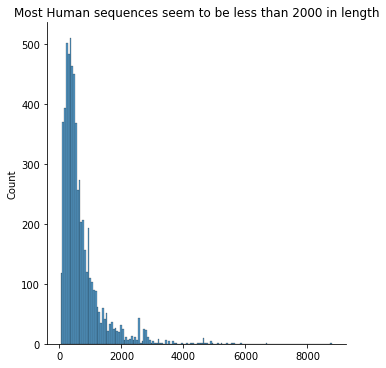

In [3]:
lengths = sorted(len(s) for s in df_train['Human'])
print("Median length of Human sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Human sequences seem to be less than 2000 in length")

Median length of Yersinia sequence is 332


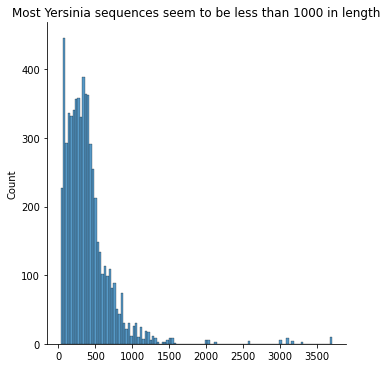

In [4]:
lengths = sorted(len(s) for s in df_train['Yersinia'])
print("Median length of Yersinia sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Yersinia sequences seem to be less than 1000 in length")

In [5]:
data1_5D_doubleip,data2_5D_doubleip,data1_test_5D_doubleip,data2_test_5D_doubleip,num_words_5D,MAX_SEQUENCE_LENGTH_5D,MAX_VOCAB_SIZE_5D = f.get_seq_data_doubleip(500000,1000,df_train,df_test)

MAX_VOCAB_SIZE is 500000
MAX_SEQUENCE_LENGTH is 1000
max sequences1_train length: 5301
min sequences1_train length: 12
median sequences1_train length: 327
max word index sequences1_train: 499999
max sequences2_train length: 3706
min sequences2_train length: 9
median sequences2_train length: 307
max word index sequences2_train: 499999
Found 1330540 unique tokens in tokenizer1.
Found 639136 unique tokens in tokenizer2.
Shape of data1 tensor: (6270, 1000)
Shape of data2 tensor: (6270, 1000)
max test_sequences1 length: 4674
min test_sequences1 length: 10
median test_sequences1 length: 271
max test_sequences2 length: 3706
min test_sequences2 length: 5
median test_sequences2 length: 244
Shape of test_data1 tensor: (1514, 1000)
Shape of test_data2 tensor: (1514, 1000)
num_words is 500000


In [6]:
embedding_layer1_5D = f.embedding_layer(num_words_5D,MAX_SEQUENCE_LENGTH_5D,EMBEDDING_DIM = 300)
embedding_layer2_5D = f.embedding_layer(num_words_5D,MAX_SEQUENCE_LENGTH_5D,EMBEDDING_DIM = 300)
BATCH_SIZE = 128
EPOCHS = 20
M_5D=50
DROPOUT = 0.3

In [7]:
inputA = Input(shape=(MAX_SEQUENCE_LENGTH_5D,),name="Human_5D_doubleip")
x1 = embedding_layer1_5D(inputA)
x1 = Bidirectional(LSTM(M_5D, return_sequences=True),name="Human_Bidirectional_5D_doubleip")(x1)
x1 = Dropout(DROPOUT)(x1)
x1 = Dense(128, activation='relu')(x1)
#x1 = Dropout(0.2)(x1)
x1 = GlobalMaxPool1D()(x1)
x1_5D_doubleip = Model(inputs=inputA, outputs=x1)

inputB = Input(shape=(MAX_SEQUENCE_LENGTH_5D,),name="Yersinia_5D_doubleip")
x2 = embedding_layer2_5D(inputB)
x2 = Bidirectional(LSTM(M_5D, return_sequences=True),name="Yersinia_Bidirectional_5D_doubleip")(x2)
x2 = Dropout(DROPOUT)(x2)
x2 = Dense(128, activation='relu')(x2)
#x2 = Dropout(0.2)(x2)
x2 = GlobalMaxPool1D()(x2)
x2_5D_doubleip = Model(inputs=inputB, outputs=x2)

concatenator = Concatenate(axis=1)
x = concatenator([x1_5D_doubleip.output, x2_5D_doubleip.output]) 
x = Dense(128, activation='relu')(x)
x = Dropout(DROPOUT)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)

model5D_doubleip = Model(inputs=[x1_5D_doubleip.input, x2_5D_doubleip.input], outputs=output)


model5D_doubleip.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)


#model.summary()

print('Training model...')
jk = model5D_doubleip.fit(
  [data1_5D_doubleip,data2_5D_doubleip],
  df_train['label'].values,
  batch_size=128,
  epochs=EPOCHS,
  #validation_split=VALIDATION_SPLIT,
  verbose=1
)

#print(roc_auc_score(df_train['label'].values, model.predict([da,data2])))

Training model...
Epoch 1/20
49/49 [==============================] - 101s 2s/step - loss: 1.2246 - accuracy: 0.5816
Epoch 2/20
49/49 [==============================] - 76s 2s/step - loss: 0.2599 - accuracy: 0.8995
Epoch 3/20
49/49 [==============================] - 78s 2s/step - loss: 0.0999 - accuracy: 0.9684
Epoch 4/20
49/49 [==============================] - 78s 2s/step - loss: 0.0587 - accuracy: 0.9783
Epoch 5/20
49/49 [==============================] - 77s 2s/step - loss: 0.0273 - accuracy: 0.9927
Epoch 6/20
49/49 [==============================] - 77s 2s/step - loss: 0.0218 - accuracy: 0.9938
Epoch 7/20
49/49 [==============================] - 77s 2s/step - loss: 0.0103 - accuracy: 0.9973
Epoch 8/20
49/49 [==============================] - 78s 2s/step - loss: 0.0161 - accuracy: 0.9954
Epoch 9/20
49/49 [==============================] - 77s 2s/step - loss: 0.0098 - accuracy: 0.9975
Epoch 10/20
49/49 [==============================] - 77s 2s/step - loss: 0.0121 - accuracy: 0.9974


In [8]:
yhat =  model5D_doubleip.predict([data1_test_5D_doubleip,data2_test_5D_doubleip])
y = df_test['label'].values
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y, yhat)
auc = metrics.auc(fpr, tpr)
auc

0.8901716956141621

In [ ]:
#model5D_doubleip.save('/content/drive/MyDrive/ML_Data/model5D_doubleip.h5')